# MVP - Previsão de Evasão de Alunos (Versão Modular)

In [1]:

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))


In [2]:

from simulacao_dados import simular_dados
from modelagem import preparar_dados, treinar_modelo, obter_importancias
from intervencoes import aplicar_nivel_risco, aplicar_intervencoes, analisar_impacto, calcular_roi
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Simulação de Dados

In [3]:

df = simular_dados(n=500)
df.head()


,idade,sexo,curso,turno,semestre_atual,nota_média,frequência,trancamentos,atraso_pagamento,tipo_ingresso,trabalha,auxílio_bolsa,evadiu
0,55,Masculino,Engenharia,Matutino,9,5.30,74.02,0,0,Vestibular,1,0,1
1,45,Feminino,Direito,Vespertino,4,8.45,81.38,0,0,Transferência,0,1,0
2,31,Feminino,Administração,Vespertino,2,5.03,66.96,1,0,Transferência,0,0,1
3,59,Masculino,Administração,Vespertino,7,4.51,81.45,1,0,Vestibular,0,0,1
4,24,Masculino,Enfermagem,Noturno,6,7.52,84.07,1,0,Vestibular,1,1,0


## 2. Treinamento do Modelo

In [4]:

X_train, X_test, y_train, y_test = preparar_dados(df)
model = treinar_modelo(X_train, y_train)
importancias = obter_importancias(model, X_train)
importancias.head()


,feature,importance
5,nota_média,0.422742
8,atraso_pagamento,0.320173
6,frequência,0.110704
0,idade,0.034751
7,trancamentos,0.029374


## 3. Importância das Variáveis

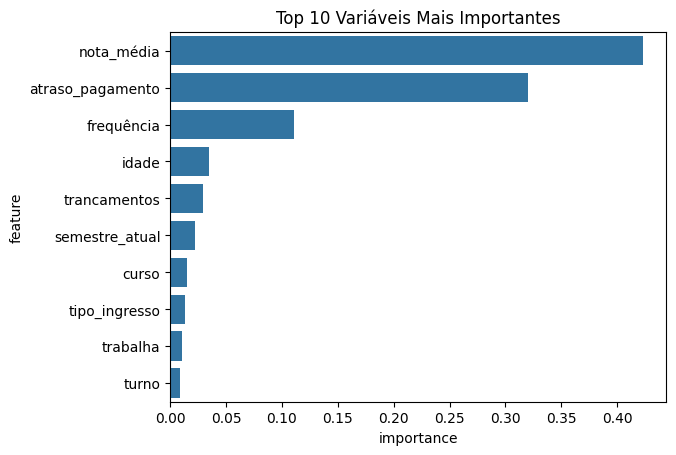

In [5]:

sns.barplot(x='importance', y='feature', data=importancias.head(10))
plt.title('Top 10 Variáveis Mais Importantes')
plt.show()


## 4. Cálculo de Risco

In [6]:

riscos, niveis = aplicar_nivel_risco(model, X_test)
niveis.value_counts()


Baixo    77
Alto     73
Name: count, dtype: int64

## 5. Simulação de Intervenção

In [7]:

df_interv = aplicar_intervencoes(df)
X_train_new, X_test_new, _, _ = preparar_dados(df_interv)
novos_riscos, _ = aplicar_nivel_risco(model, X_test_new)


## 6. Análise de Impacto e ROI

In [8]:

impacto = analisar_impacto(riscos, novos_riscos)
roi = calcular_roi(len(riscos), impacto, custo_intervencao=1000)

print(f"Impacto médio: {impacto:.2%}")
print(f"ROI estimado: {roi:.2%}")


Impacto médio: 10.40%
ROI estimado: 56.00%
